# CIFAR 100 Image Classification 

 This dataset contains 100 different classes of image. Each classes contain 500 other images therefore we can say the data is properly organised.  All images are of `3 channels` of dimensions `32 x 32` . We will be applying different Deep Learning approaches to get the best outputs from this dataset. 
 
 I would like to mention [This site](https://www.kaggle.com/minbavel/cifar-100-images) from where I took the dataset on which I will be working on . I would also like to thank Jovian.ml team and [Aakash N S](https://github.com/aakashns)(Founder of Jovian.ml) for whom this project and this course on Deep Learnig with pytorch was possible . I am doing this Project with the help of the notebooks and course material provided in the [Deep Learning with pytorch : Zero To Gans](https://jovian.ml/forum/c/pytorch-zero-to-gans/18) course. This course is uploaded in You Tube for Free in freecodecamp.org YouTube Channel.  

In [1]:
!pip install opendatasets --upgrade -q
!pip install jovian --upgrade -q

In [2]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import os
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

In [3]:
dataset_url = 'https://www.kaggle.com/minbavel/cifar-100-images'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: birajde
Your Kaggle Key: ········


  0%|          | 0.00/140M [00:00<?, ?B/s]

100%|██████████| 140M/140M [00:02<00:00, 56.5MB/s] 


## How to get Kaggle Key and Username?

1. Sign in to https://kaggle.com/, then click on your profile picture on the top right and select "My Account" from the menu
2. Scroll down to the "API" section and click "Create New API Token". This will download a file kaggle.json with the following contents: {"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}
3. When you run opendatsets.download, you will be asked to enter your username & Kaggle API, which you can get from the file downloaded in step 2.

In [4]:
project_name="Cifar-100"

## Preparing the Data

Let's begin by downloading the dataset and creating PyTorch datasets to load the data.

Here in my Project I will be using dataset that is already present in Kaggle data section. 
I am using CIFAR 100 dataset from https://www.kaggle.com/minbavel/cifar-100-images

In [5]:
# I dowloaded the dataset using OpenDataset Library and by entering my Kaggle Key and Kaggle Username
# Let's look into the data directory
data_dir = './cifar-100-images/CIFAR100'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes[:10])
print(len(classes))

['TRAIN', 'TEST']
['mushroom', 'lawn_mower', 'spider', 'crab', 'wardrobe', 'girl', 'flatfish', 'skyscraper', 'sea', 'bee']
100


In [6]:
# Let's evaluate a single class say "man"
man_file=os.listdir(data_dir+"/TRAIN/man")
print("NO. of Training examples for Man:",len(man_file))
print(man_file[:5])

NO. of Training examples for Man: 500
['adam_s_001653.png', 'man_s_000464.png', 'adam_s_001279.png', 'abel_s_000495.png', 'adam_s_002324.png']


In [7]:
# Let's see how many number of files/images are present in each classes
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+"/TRAIN/"+i))
print(di)

{'mushroom': 500, 'lawn_mower': 500, 'spider': 500, 'crab': 500, 'wardrobe': 500, 'girl': 500, 'flatfish': 500, 'skyscraper': 500, 'sea': 500, 'bee': 500, 'lizard': 500, 'television': 500, 'beetle': 500, 'sweet_pepper': 500, 'boy': 500, 'seal': 500, 'orchid': 500, 'leopard': 500, 'keyboard': 500, 'tiger': 500, 'baby': 500, 'pickup_truck': 500, 'train': 500, 'squirrel': 500, 'cloud': 500, 'bus': 500, 'camel': 500, 'fox': 500, 'clock': 500, 'plate': 500, 'crocodile': 500, 'bed': 500, 'dinosaur': 500, 'lamp': 500, 'palm_tree': 500, 'orange': 500, 'trout': 500, 'ray': 500, 'aquarium_fish': 500, 'rocket': 500, 'dolphin': 500, 'rose': 500, 'tractor': 500, 'wolf': 500, 'forest': 500, 'bridge': 500, 'mouse': 500, 'otter': 500, 'can': 500, 'castle': 500, 'telephone': 500, 'chimpanzee': 500, 'tulip': 500, 'kangaroo': 500, 'cup': 500, 'raccoon': 500, 'maple_tree': 500, 'lion': 500, 'tank': 500, 'possum': 500, 'chair': 500, 'beaver': 500, 'oak_tree': 500, 'skunk': 500, 'caterpillar': 500, 'snail':

# Training the Dataset 

In [8]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])

In [9]:
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

In [10]:
# Let's use batch size
batch_size = 400

In [11]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

Here are some examples after applying data augmentation and Normalization

In [12]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break

## Using a GPU

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [13]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [14]:
device = get_default_device()
device

device(type='cuda')

In [15]:
# Transfering data to the device in use (In our case GPU)
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [16]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [17]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet152(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.conv5 = conv_block(512, 1028, pool=True)
        self.res3 = nn.Sequential(conv_block(1028, 1028), conv_block(1028, 1028))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), 
                                        nn.Flatten(), 
                                        nn.Linear(1028, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.res3(out) + out
        out = self.classifier(out)
        return out

In [18]:
model = to_device(ResNet152(3, 100), device)
model

ResNet152(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=

# Training the model



In [19]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [20]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 4.604766368865967, 'val_acc': 0.01903846114873886}]

In [21]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay =1e-4
opt_func = torch.optim.Adam

In [22]:
#model.freeze()

In [23]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00278, train_loss: 3.7641, val_loss: 6.0671, val_acc: 0.1010
Epoch [1], last_lr: 0.00759, train_loss: 3.0850, val_loss: 3.1388, val_acc: 0.2491
Epoch [2], last_lr: 0.01000, train_loss: 2.3472, val_loss: 2.5365, val_acc: 0.3612
Epoch [3], last_lr: 0.00950, train_loss: 1.9501, val_loss: 3.3974, val_acc: 0.3539
Epoch [4], last_lr: 0.00812, train_loss: 1.6884, val_loss: 3.3708, val_acc: 0.4757
Epoch [5], last_lr: 0.00611, train_loss: 1.4432, val_loss: 1.7190, val_acc: 0.5343
Epoch [6], last_lr: 0.00389, train_loss: 1.2261, val_loss: 1.4099, val_acc: 0.6063
Epoch [7], last_lr: 0.00188, train_loss: 0.9602, val_loss: 1.1756, val_acc: 0.6620
Epoch [8], last_lr: 0.00050, train_loss: 0.6997, val_loss: 1.0332, val_acc: 0.7011
Epoch [9], last_lr: 0.00000, train_loss: 0.5279, val_loss: 0.9940, val_acc: 0.7116
CPU times: user 2min 18s, sys: 1min 5s, total: 3min 23s
Wall time: 7min 50s


In [24]:
#model.unfreeze()

In [25]:
%%time
history += fit_one_cycle(epochs, 0.001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00028, train_loss: 0.4980, val_loss: 1.0097, val_acc: 0.7079
Epoch [1], last_lr: 0.00076, train_loss: 0.5121, val_loss: 1.0761, val_acc: 0.6909
Epoch [2], last_lr: 0.00100, train_loss: 0.5467, val_loss: 1.2061, val_acc: 0.6729
Epoch [3], last_lr: 0.00095, train_loss: 0.5130, val_loss: 1.2052, val_acc: 0.6642
Epoch [4], last_lr: 0.00081, train_loss: 0.4248, val_loss: 1.1885, val_acc: 0.6796
Epoch [5], last_lr: 0.00061, train_loss: 0.3366, val_loss: 1.0940, val_acc: 0.6979
Epoch [6], last_lr: 0.00039, train_loss: 0.2439, val_loss: 1.0720, val_acc: 0.7098
Epoch [7], last_lr: 0.00019, train_loss: 0.1693, val_loss: 1.0315, val_acc: 0.7219
Epoch [8], last_lr: 0.00005, train_loss: 0.1289, val_loss: 1.0188, val_acc: 0.7275
Epoch [9], last_lr: 0.00000, train_loss: 0.1132, val_loss: 1.0194, val_acc: 0.7265
CPU times: user 2min 16s, sys: 1min 4s, total: 3min 20s
Wall time: 7min 51s


In [26]:
%%time
history += fit_one_cycle(4, 0.00001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00001, train_loss: 0.1076, val_loss: 1.0210, val_acc: 0.7274
Epoch [1], last_lr: 0.00001, train_loss: 0.1071, val_loss: 1.0191, val_acc: 0.7280
Epoch [2], last_lr: 0.00000, train_loss: 0.1070, val_loss: 1.0205, val_acc: 0.7281
Epoch [3], last_lr: 0.00000, train_loss: 0.1041, val_loss: 1.0211, val_acc: 0.7279
CPU times: user 53.4 s, sys: 24.7 s, total: 1min 18s
Wall time: 3min 10s


In [27]:
%%time
history += fit_one_cycle(4, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00009, train_loss: 0.1074, val_loss: 1.0301, val_acc: 0.7284
Epoch [1], last_lr: 0.00008, train_loss: 0.1045, val_loss: 1.0332, val_acc: 0.7281
Epoch [2], last_lr: 0.00003, train_loss: 0.0939, val_loss: 1.0359, val_acc: 0.7282
Epoch [3], last_lr: 0.00000, train_loss: 0.0843, val_loss: 1.0324, val_acc: 0.7306
CPU times: user 53.8 s, sys: 24.9 s, total: 1min 18s
Wall time: 3min 8s


In [45]:
%%time
history += fit_one_cycle(10, 0.0001, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00003, train_loss: 0.0843, val_loss: 1.0360, val_acc: 0.7297
Epoch [1], last_lr: 0.00008, train_loss: 0.0813, val_loss: 1.0448, val_acc: 0.7288
Epoch [2], last_lr: 0.00010, train_loss: 0.0815, val_loss: 1.0601, val_acc: 0.7268
Epoch [3], last_lr: 0.00010, train_loss: 0.0740, val_loss: 1.0590, val_acc: 0.7308
Epoch [4], last_lr: 0.00008, train_loss: 0.0689, val_loss: 1.0674, val_acc: 0.7271
Epoch [5], last_lr: 0.00006, train_loss: 0.0614, val_loss: 1.0681, val_acc: 0.7296
Epoch [6], last_lr: 0.00004, train_loss: 0.0566, val_loss: 1.0727, val_acc: 0.7317
Epoch [7], last_lr: 0.00002, train_loss: 0.0502, val_loss: 1.0708, val_acc: 0.7312
Epoch [8], last_lr: 0.00000, train_loss: 0.0489, val_loss: 1.0754, val_acc: 0.7303
Epoch [9], last_lr: 0.00000, train_loss: 0.0483, val_loss: 1.0749, val_acc: 0.7301
CPU times: user 2min 21s, sys: 1min 9s, total: 3min 31s
Wall time: 7min 48s


In [46]:
train_time='30:00'

In [47]:
# Plotted the accuracy Graph
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

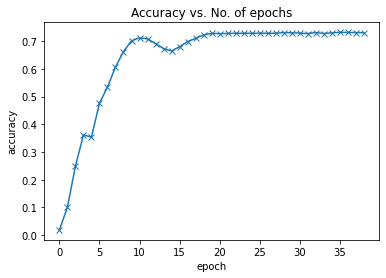

In [48]:
plot_accuracies(history)

In [49]:
# Training and Validation loss graph
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

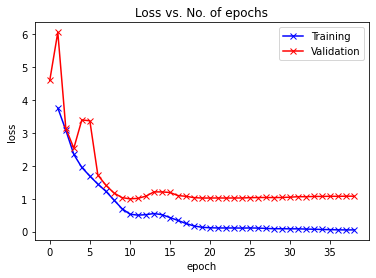

In [50]:
plot_losses(history)

In [51]:
# Learning Rate Graph
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

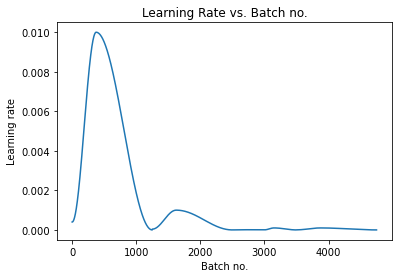

In [52]:
plot_lrs(history)

# **Prediction and testing of MODEL**

In [53]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)

In [54]:
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

In [55]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: bed , Predicted: bed


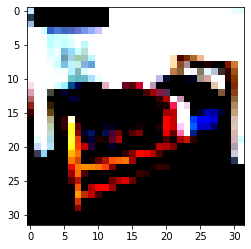

In [56]:

img, label = test_dataset[550]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: apple , Predicted: apple


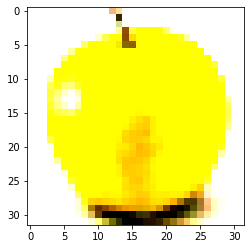

In [57]:
img, label = test_dataset[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: aquarium_fish , Predicted: aquarium_fish


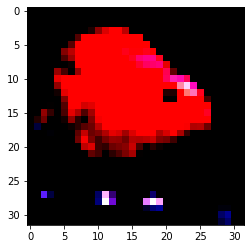

In [58]:

img, label = test_dataset[117]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: baby , Predicted: baby


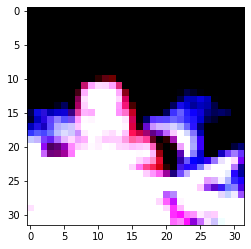

In [59]:

img, label = test_dataset[210]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: bed , Predicted: streetcar


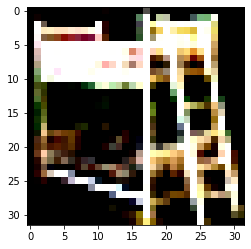

In [60]:
img, label = test_dataset[589]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [61]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 1.0748599767684937, 'val_acc': 0.7300961017608643}

## Save and Commit

Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. As you try different ideas, make sure to record every experiment so you can look back and analyze the results.

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.

In [64]:
torch.save(model.state_dict(), 'cifar100-resnet12layers.pth')

In [65]:
model2 = to_device(ResNet152(3, 100), device)

In [66]:
model2.load_state_dict(torch.load('cifar100-resnet12layers.pth'))

<All keys matched successfully>

In [67]:
evaluate(model2, test_loader)

{'val_loss': 1.0748599767684937, 'val_acc': 0.7300961017608643}

In [68]:
import jovian

<IPython.core.display.Javascript object>

In [69]:
jovian.reset()
jovian.log_hyperparams(arch='simple-cnn\n12_layers\n3_res_layers', 
                       epochs=(10,10,4,4,10), 
                       lr=(0.001,0.005,0.00001,0.0001,0.0001), 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__,
                       normalization="true",
                       data_augmentation="true"
                      )

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Hyperparams logged.


In [70]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   test_acc=result['val_acc'],
                   time=train_time)

[jovian] Metrics logged.


In [71]:
jovian.commit(project=project_name, environment=None, outputs=['cifar100-resnet9.pth'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ai/birajde9/Cifar-100


<IPython.core.display.Javascript object>